### The effect of temperature and reaction time affects the %yield. Develop a model for %yield in terms of temperature and time

In [21]:
import pandas as mypanda
import numpy as np
from scipy import stats as mystats
import matplotlib.pyplot as myplot
from pandas.tools.plotting import scatter_matrix
from statsmodels.formula.api import ols as myols
from statsmodels.stats.anova import anova_lm

In [2]:
myData=mypanda.read_csv('.\datasets\Mult_Reg_Yield.csv')
myData

,Time,Temperature,Yield
0,130,190,35.0
1,174,176,81.7
2,134,205,42.5
3,191,210,98.3
4,165,230,52.7
5,194,192,82.0
6,143,220,34.5
7,186,235,95.4
8,139,240,56.7
9,188,230,84.4


In [3]:
tmp=myData.Temperature
yld =myData.Yield
time=myData.Time

##### check for relationship now

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


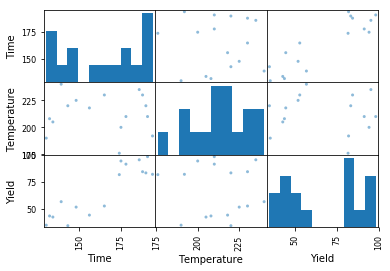

In [4]:
scatter_matrix(myData)
myplot.show()

##### correlation between xs and y should be high

In [5]:
np.corrcoef(tmp,yld)

array([[ 1.        , -0.05456951],
       [-0.05456951,  1.        ]])

In [6]:
np.corrcoef(time,yld)

array([[1.        , 0.89671196],
       [0.89671196, 1.        ]])

In [7]:
np.corrcoef(time,tmp)

array([[ 1.        , -0.00756007],
       [-0.00756007,  1.        ]])

In [22]:
mymodel=myols("yld ~ time + tmp",myData)
mymodel=mymodel.fit()
mymodel.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    yld   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     27.07
Date:                Wed, 21 Mar 2018   Prob (F-statistic):           2.32e-05
Time:                        17:52:04   Log-Likelihood:                -59.703
No. Observations:                  16   AIC:                             125.4
Df Residuals:                      13   BIC:                             127.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -67.8844     40.587     -1.673      0.118    -155.566      19.797
time           0.9061      0.123      7.344      0.000       0.640       1.173
tmp           -0.0642      0.164     -0.392      0.702      -0.418       0.290
==============================================================================
Omnibus:                        1.984   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                0.970
Skew:                          -0.078   Prob(JB):                        0.616
Kurtosis:                       1.804   Cond. No.                     3.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### check p value ==> only time is related to yield

In [23]:
anovaTable = anova_lm(mymodel)
anovaTable

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
time,1.0,6777.810462,6777.810462,53.987220,0.000006
tmp,1.0,19.252534,19.252534,0.153352,0.701696
Residual,13.0,1632.081378,125.544721,NaN,NaN


In [9]:
mymodel=myols("yld ~ time ",myData).fit()
mymodel.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    yld   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     57.46
Date:                Wed, 21 Mar 2018   Prob (F-statistic):           2.55e-06
Time:                        17:41:26   Log-Likelihood:                -59.797
No. Observations:                  16   AIC:                             123.6
Df Residuals:                      14   BIC:                             125.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -81.6205     19.791     -4.124      0.001    -124.067     -39.174
time           0.9065      0.120      7.580      0.000       0.650       1.163
==============================================================================
Omnibus:                        1.894   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                0.969
Skew:                          -0.127   Prob(JB):                        0.616
Kurtosis:                       1.822   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
pred=mymodel.predict()
res=yld-pred
res

0     -1.218472
1      5.597558
2      2.655712
3      6.787842
4    -15.244357
5    -12.231519
6    -13.502372
7      8.420112
8     12.323443
9     -4.392796
10    17.291104
11   -15.486272
12    -7.305704
13    11.671743
14     5.468620
15    -0.834642
Name: Yield, dtype: float64

In [11]:
#print(yld, res)

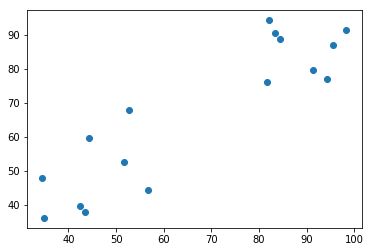

In [12]:
myplot.scatter(yld,pred)
myplot.show()

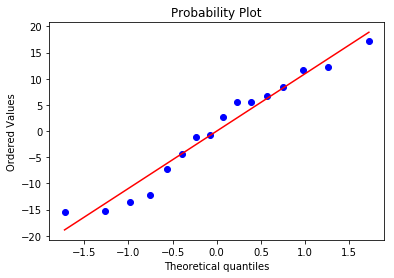

In [13]:
mystats.probplot(res,plot=myplot)
myplot.show()

In [14]:
mystats.normaltest(res)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=1.8944805759902852, pvalue=0.3878097913672068)

##### Implies it is normal

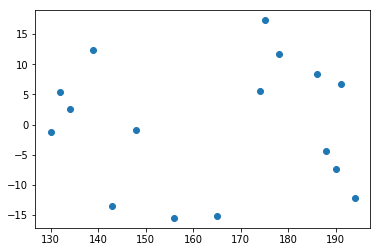

In [24]:
myplot.scatter(time,res)
myplot.show()

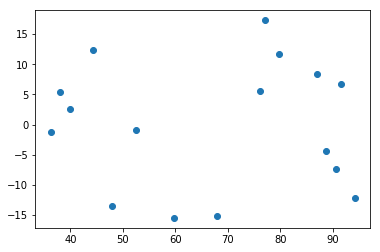

In [25]:
myplot.scatter(pred,res)
myplot.show()

##### random values /scattered plot means that the model is good.
there should not be any pattern in the plot. if pattern then there exists a better prediction using the method